In [1]:
import numpy as np
import matplotlib.pyplot as plt

import pyvista as pv
import seaborn as sb

In [71]:
mesh = pv.read('/Users/jrobrien/Dissertation/data/solutions/LPT/extended_v4_VTK/lagrangian/kinematicCloudTracks/kinematicCloudTracks_2000.vtk')

In [72]:
mesh

PolyData (0x17b6af2e0)
  N Cells:    1254377
  N Points:   1254377
  N Strips:   0
  X Bounds:   -7.000e+00, 5.000e+01
  Y Bounds:   2.615e+00, 3.000e+00
  Z Bounds:   1.357e+01, 1.383e+01
  N Arrays:   12

In [73]:
mesh.point_data['age']

pyvista_ndarray([5.296471 , 5.3381386, 5.379806 , ..., 3.604992 ,
                 3.6466584, 3.6883254], dtype=float32)

In [74]:
# Create the plotter
pt = pv.Plotter()
# Add the slice mesh
pt.add_mesh(mesh, 
            scalars='U', 
            preference='point'
           )
pt.show()

Widget(value="<iframe src='http://localhost:51587/index.html?ui=P_0x17ef21520_1&reconnect=auto' style='width: …

In [6]:
x = np.where(mesh.point_data['U'][:, 0] == np.min(mesh.point_data['U'][:, 0]))

In [78]:
mesh.points[x, 0]

pyvista_ndarray([[13.499936, 13.812136, 13.968669, ..., 14.438227,
                  14.515221, 14.655309]], dtype=float32)

## Seaborn KDE plot - Kernel Density Estimate

In [33]:
# Find the default particle field on the inlet
def define_space(mesh, x=[-8, -7], y=[2, 3], z=[13.6, 13.8]):
    """ origin is list of 3D coordinates to find location of """
    def intersect(arr, low, high):
        nlow = np.where(arr > low)
        nhigh = np.where(arr < high)
        return np.intersect1d(nlow, nhigh)
    
    def conc(subset, x, y, z):
        """ with subset of particles, give conc of subset """
        volume = (abs(x[1] - x[0]) * abs(y[1] - y[0]) * abs(z[1] - z[0]))
        vol_cc = volume * 1e6
        return subset.shape[0] / vol_cc
    
    def twodi_conc(subset, y, z):
        """ with subset of particles, give conc of subset """
        volume2 = abs(y[1] - y[0]) * abs(z[1] - z[0])
        vol_cc2 = volume2 * 1e6
        return subset.shape[0] / vol_cc2
      
    # find the points in the mesh near the origin
    # This is ultimately a slice along X; don't care yz distrib
    nx = intersect(mesh.points[:, 0], x[0], x[1])
    ny = intersect(mesh.points[:, 1], y[0], y[1])
    nz = intersect(mesh.points[:, 2], z[0], z[1])
    print(nx, ny, nz)
    tmpx = np.intersect1d(nx, ny)
    subset = np.intersect1d(tmpx, nz)
    if subset.shape[0] > 1:
        print(subset.shape, conc(subset, x, y, z), ' per cc', twodi_conc(subset, y, z), ' per cm2')
        return subset
    else:
        raise BaseException('NO VALID SUBSET')

In [47]:
x = np.where(mesh.points[:, 0] > 14.4)
y = np.where(mesh.points[:, 0] < 14.6)
z = np.intersect1d(x, y)

In [48]:
z

array([     5,     19,     33, ..., 745518, 745532, 745546])

In [79]:
goose = define_space(mesh, x=[-6, -5.8], y=[2.6, 2.85])

[      0      20      40 ... 1250917 1250941 1250965] [      0       1       2 ... 1250986 1250987 1250988] [   1566    1567    1568 ... 1111387 1111388 1111389]
(11857,) 1.1856999999999926  per cc 0.2371399999999987  per cm2


In [80]:
newgoose = define_space(mesh, x=[13.8, 14.0], y=[2.6, 2.85])

[      6       7      26 ... 1254340 1254361 1254362] [      0       1       2 ... 1250986 1250987 1250988] [   1566    1567    1568 ... 1111387 1111388 1111389]
(20980,) 2.0979999999999963  per cc 0.41959999999999775  per cm2


In [81]:
newgoose.shape

(20980,)

In [82]:
goose.shape

(11857,)

### Display KDE of the Inlet `Cloud`

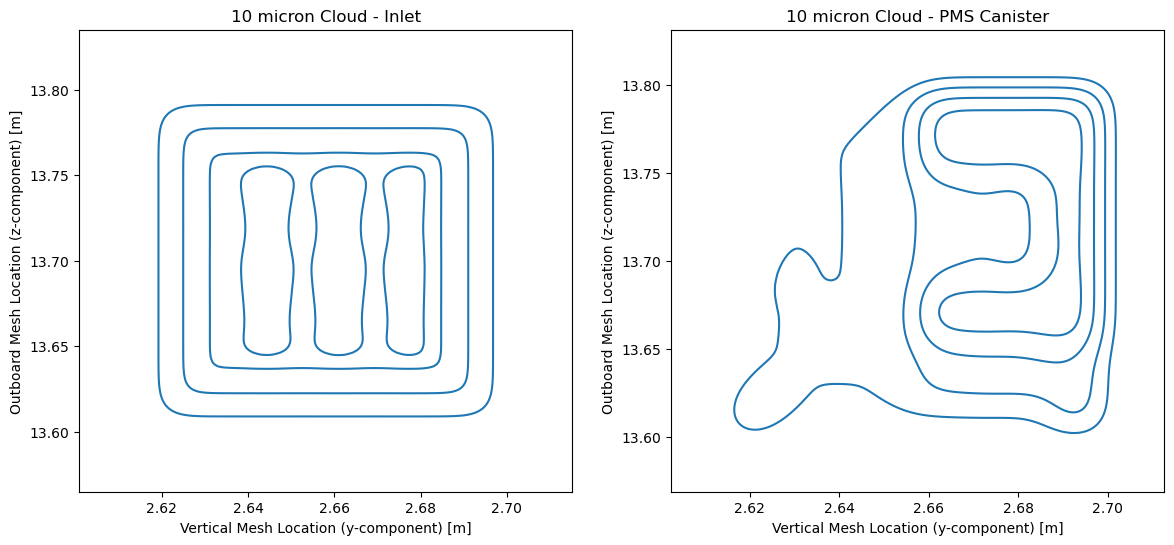

In [83]:
fig, axarr = plt.subplots(1, 2, figsize=[14, 6])
sb.kdeplot(data=mesh.point_data['U'][goose, 0], 
           x=mesh.points[goose, 1], 
           y=mesh.points[goose, 2],
           levels=[0, 0.2, 0.4, 0.6, 0.8],
           shade=False,
           ax=axarr[0],
           cbar=False)
axarr[0].set_ylabel('Outboard Mesh Location (z-component) [m]')
axarr[0].set_xlabel('Vertical Mesh Location (y-component) [m]')
#axarr[0].axvline(x=-0.24, ymin=-0.1, ymax=20, color='k', linestyle='--')
#axarr[0].axvline(x=-0.12, ymin=-0.1, ymax=20, color='k', linestyle='--')
#axarr[0].axhline(y=0.45, xmin=-0.1, xmax=20, color='k', linestyle='--')
#axarr[0].axhline(y=-0.05, xmin=-0.1, xmax=20, color='k', linestyle='--')
#axarr[0].set_xlim([-0.1, -0.25])
axarr[0].set_title('10 micron Cloud - Inlet')
#axarr[0].set_ylim([-0.1, 0.55])

# zoom in boundaries
sb.kdeplot(data=mesh.point_data['U'][newgoose, 0], 
           x=mesh.points[newgoose, 1], 
           y=mesh.points[newgoose, 2],
           levels=[0, 0.2, 0.4, 0.6, 0.8], 
           shade=False,
           ax=axarr[1],
           cbar=False)
#axarr[1].set_xlim([-0.1, -0.25])
axarr[1].set_ylabel('Outboard Mesh Location (z-component) [m]')
axarr[1].set_xlabel('Vertical Mesh Location (y-component) [m]')
axarr[1].set_title('10 micron Cloud - PMS Canister')
#axarr[1].axvline(x=-0.24, ymin=-0.1, ymax=20, color='k', linestyle='--')
#axarr[1].axvline(x=-0.12, ymin=-0.1, ymax=20, color='k', linestyle='--')
#axarr[1].axhline(y=0.45, xmin=-0.1, xmax=20, color='k', linestyle='--')
#axarr[1].axhline(y=-0.05, xmin=-0.1, xmax=20, color='k', linestyle='--')

plt.savefig('extended_pmsCanister_kde.png')
#axarr[1].set_ylim([-0.1, 0.55])
#axarr[1].set_xlim([0.1, -0.3])
#axarr[1].set_ylim([0.55, -0.1])

### Along Canister

In [16]:
kait = define_space(mesh, x=[0, 1], y=[-3, 3])

(178007,) 0.07416958333333332  per cc


(1.0, 0.0)

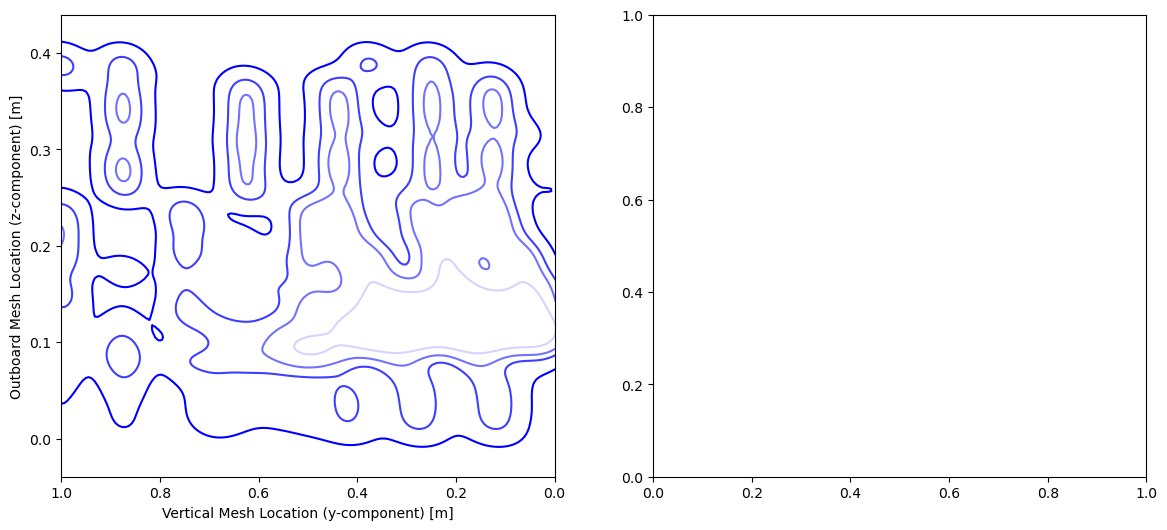

In [17]:
fig, axarr = plt.subplots(1, 2, figsize=[14, 6])
sb.kdeplot(data=mesh.point_data['U'][kait, 0], 
           x=mesh.points[kait, 0], 
           y=mesh.points[kait, 2],
           cmap='bwr',
           levels=5, 
           shade=False,
           ax=axarr[0],
           cbar=False)
axarr[0].set_ylabel('Outboard Mesh Location (z-component) [m]')
axarr[0].set_xlabel('Vertical Mesh Location (y-component) [m]')
#axarr[0].axvline(x=0.05, ymin=-0.1, ymax=20, color='k', linestyle='--')
#axarr[0].axvline(x=-0.05, ymin=-0.1, ymax=20, color='k', linestyle='--')
#axarr[0].axhline(y=0.45, xmin=-0.1, xmax=0.1, color='k', linestyle='--')
#axarr[0].axhline(y=-0.05, xmin=-0.1, xmax=0.1, color='k', linestyle='--')
axarr[0].set_xlim([1, 0])
#axarr[0].set_ylim([0.55, -0.1])

# zoom in boundaries
#sb.kdeplot(data=mesh.point_data['U'][newgoose, 0], 
#           x=mesh.points[newgoose, 1], 
#           y=mesh.points[newgoose, 2],
#           cmap='bwr', 
#           thresh=0.01, 
#           shade=True,
#           ax=axarr[1],
#           cbar=True)
#axarr[1].set_xlim([0.1, -0.3])
#axarr[1].set_ylim([0.55, -0.1])

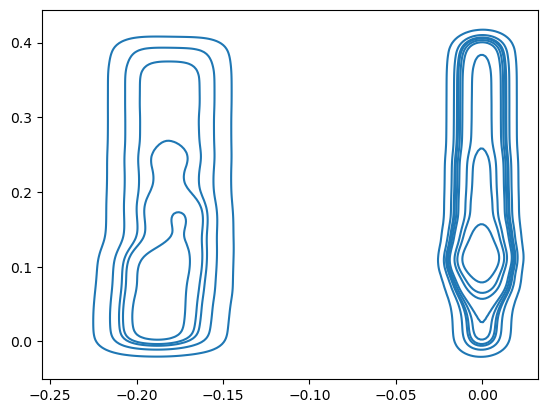

In [18]:
res = sb.kdeplot(data=mesh.point_data['U'][:, 0], x=mesh.points[:, 1], y=mesh.points[:, 2])

In [19]:
mesh.center

[1.0000064373016357, -0.11136700108181685, 0.19675027206540108]

In [20]:
pv.plot(mesh)

Widget(value="<iframe src='http://localhost:59378/index.html?ui=P_0x164d4c340_1&reconnect=auto' style='width: …